<a href="https://colab.research.google.com/github/AKOrojo/Classes/blob/main/Applications_in_Dimensionality_Reduction_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install visualkeras

In [6]:
# Import Modules
from keras.datasets import mnist
from keras.layers import Dense
from keras import Model, Input
import matplotlib.pyplot as plt
import visualkeras

In [7]:
# Train and Test Split
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


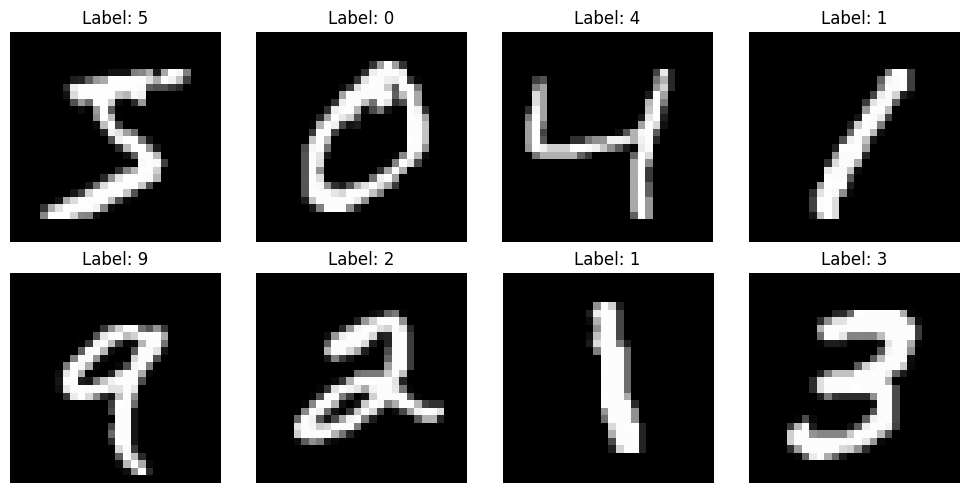

In [8]:
# Create a figure with 2 rows and 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(10, 5))

# Loop over the first 8 images and display them
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Reshape into 1-D Arrays of 784 elements
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

In [18]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [10]:
inpt_dim = 28*28
ltnt_dim = 2

inpt_vec = Input(shape=(inpt_dim,))

elayer1 = Dense(392, activation='sigmoid')(inpt_vec)
elayer2 = Dense(28, activation='sigmoid') (elayer1)
elayer3 = Dense(10, activation='sigmoid') (elayer2)
encoder = Dense(ltnt_dim, activation='tanh')(elayer3)

dlayer1 = Dense(10, activation='sigmoid')(encoder)
dlayer2 = Dense(28, activation='sigmoid')(dlayer1)
dlayer3 = Dense(392, activation='sigmoid')(dlayer2)
decoder = Dense(inpt_dim, activation='sigmoid')(dlayer3)

latent_ncdr = Model(inpt_vec, encoder)
autoencoder = Model(inpt_vec, decoder)

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

hist = autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3150 - val_loss: 0.2630
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2626 - val_loss: 0.2572
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2519 - val_loss: 0.2423
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2426 - val_loss: 0.2404
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2408 - val_loss: 0.2389
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2392 - val_loss: 0.2370
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2377 - val_loss: 0.2355
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2365 - val_loss: 0.2349
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2355 - val_loss: 0.2337
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2347 - val_loss: 0.2328
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2336 - val_loss: 0.2283
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━

/opt/homebrew/Caskroom/miniconda/base/envs/Classes/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


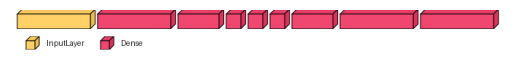

In [11]:
# Generate the visual representation of the model
img = visualkeras.layered_view(
    autoencoder,
    legend=True,
    draw_volume=True,
    scale_z=2,
    min_z=20,
    max_z=100,
    draw_funnel=False
)

plt.imshow(img)
plt.axis('off')
plt.show()

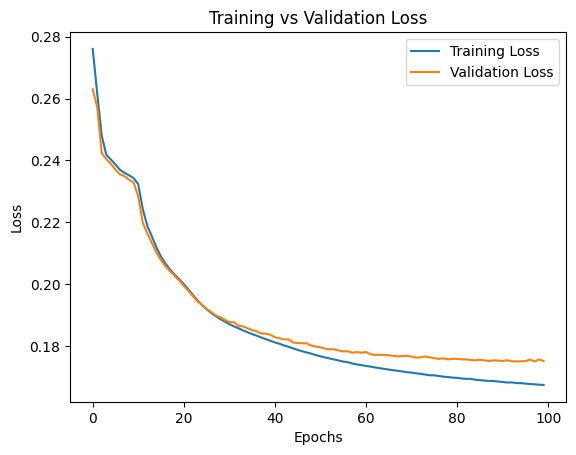

In [12]:
# Plot training loss
plt.plot(hist.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(hist.history['val_loss'], label='Validation Loss')

plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
encdd = latent_ncdr.predict(x_test)
x_hat = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


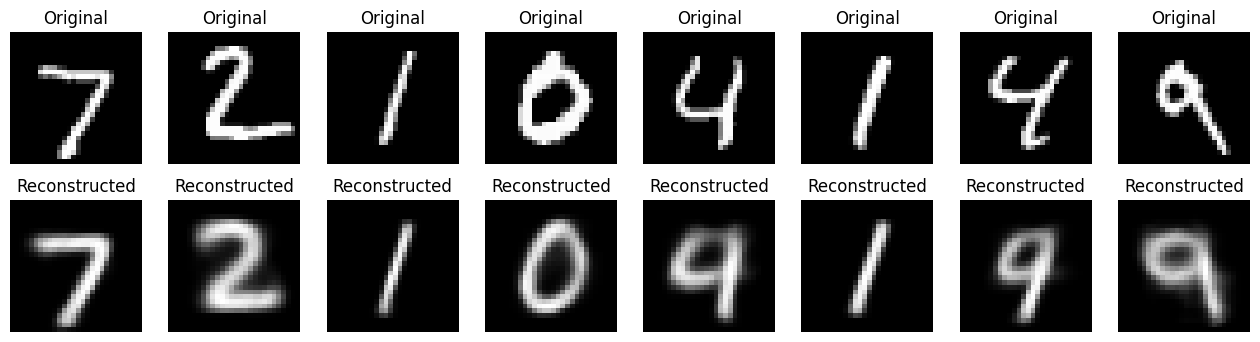

In [14]:
n = 8

# Generate reconstructed images from the test set
x_hat = autoencoder.predict(x_test)

# Create a figure to display the images
plt.figure(figsize=(16, 4))
for i in range(n):
    # Plot original image (top row)
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Plot reconstructed image (bottom row)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_hat[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()

(10000, 2)


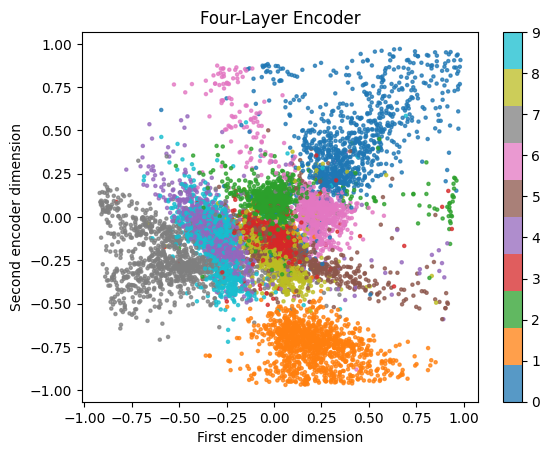

In [15]:
y_ = list(map(int, y_test))
X_ = encdd

print(X_.shape)

plt.title('Four-Layer Encoder')
plt.scatter(X_[:,0], X_[:,1], s=5.0, c=y_, alpha=0.75, cmap='tab10')
plt.xlabel('First encoder dimension')
plt.ylabel('Second encoder dimension')
plt.colorbar()